# Random Forest first Lesson

first Kaggle challenge
https://www.kaggle.com/c/bluebook-for-bulldozers/data

Medium Artikel
https://medium.com/@hiromi_suenaga/machine-learning-1-lesson-1-84a1dc2b5236

## Imports

In [118]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,ExtraTreesRegressor
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = "data/bulldozers-kaggle/"

1. Setzt config parameter, Grafiken inline oder reload
2. Importierte alle Librarys, die wir benötigen
3. Path zu den Daten 

=> sollte eingentlich in jedem Notebook so sein

### man kann cli commands mit !ls machne

In [4]:
!ls {PATH}

Train.csv


### Display method for data

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

# First step is to look at the DATA

df = Dataframe

### stringliterals in python 


In [6]:
name = 'Philipp'

In [7]:
f'Hello {name}'

'Hello Philipp'

In [8]:
df_raw = pd.read_csv(f'{PATH}Train.csv',low_memory=False,parse_dates=['saledate'])

# parse_date convertiert string to date wenn es so einigermaßen passt -> Liste mit komma getrennt

In [9]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* transponieren Columns -> Headers

In [10]:
#display_all(df_raw.tail().transpose())

# oder anstannt .transpose()  geht auch T

display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


## Was wollen wir machen ?

Predict column **Salesprice**

Machine Learning driven EDA -> Jemery Howard - Bear notiz

RMSLE (Root mean squared log error) 
 -> difference between actual and predicted auction prices

In [11]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [12]:
display_all(df_raw.SalePrice)

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

## Initial processing

### RandomForest -> *n Bear*
-> kind of universal predicitor
-> decision tree
* predict category like cat or dog 
* predict continuous variable like price
* predict columns of every kind
* in general doesnt overfit
* few feature engineering
* other words create place to start 
* if its work directly your data might be shit


addition:
* high dimension nearest neighbors works very nice
* building models with many columns works very good
* no type of model with works well with every kind of dataset -> no all rounder

#### You can do two type of Things with RandomForrest
* Regressor
    -> for predicting continuous variable called regressor
* Classifier
    -> for predicting categorical variable called classifier


Regression <> Linear Regression

Regression means ml-model predicting an continuous outcome 

In [13]:
# docs source code or shift + Tab

??df_raw.drop

#### In Scikit-learn every time same form
* create instance of object of ml-model you use
* calling .fit() passing 
   * the independent variables which you use to predict 
   * than the depended variable what you want to predict

-> pd.drop() creates a new dataframe without the column passed in

independent variable all data except SalePrice which will be predicted 


In [14]:
##m = RandomForestRegressor(n_jobs=-1)
##m.fit(df_raw.drop('SalePrice',axis=1),df_raw.SalePrice)

at StackTrace Error scroll to the bottom

-> Forest accept only numbers 

In [15]:
df_raw.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

# Feature Engineering

## 1. Change Date format to multiple number columns


from date you can get DimDate -> Year,Month,Day,CalendarDay,Quartal,Holyday,Weekend,RainyDay,Sportsevent,

date is one of the most important thing in feature engineering

In [16]:
#add_datepart creates dimDate

add_datepart(df_raw,'saledate')

df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [17]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [18]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


## 2. Create Categorical Columns from string values

date changed to number next step is to create categorical columns from string columns

e.g. High, Low, Medium ==> 0,1,2

train_cats -> fastai method for creating it

In [19]:
??train_cats

In [20]:
train_cats(df_raw) 

**attention**

categorical features can differ from train to test set, maybe you have 'high' as 3 in train but in test its 2 
for this there is *apply_cats* -> transfers existing categorical to training

In [21]:
df_raw.UsageBand.cat.categories
# dataset.column.categorical.values

# .cat stands for every column which is categorical

Index(['High', 'Low', 'Medium'], dtype='object')

be noticed the top category is unordered -> High Low Medium 

-> is doesn´t matter but to reduce complexity and make it easier to read reorder it

reorder with *set_categories*

In [22]:
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'],ordered=True,inplace=True)

#inplace => overwrites dataframe 

In [23]:
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

### Errors if done

Spalte muss ersetzt werden 

In [24]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

## 3. Filter NaN and missing values

done later scroll down

In [25]:
#displays summ of all null values for each column in percentage 

display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

### Tip

after feature Engineering or at least a view steps which are done by 100% are completed save your dataset

therefore create a tmp directory in your PATH folder and save it 

* feather format = save in ram 

In [26]:
os.makedirs('tmp',exist_ok=True)

df_raw.to_feather('tmp/raw')

after it you can load it with 

* read_feather()

In [27]:
df_raw= pd.read_feather('tmp/raw')

## 4. Replace Categorical and handle missing

* replace categorical strings with there number values
* handle missing continuous values
* split the dependent (SalePrice) into a separate Variable

df_raw is now df -> because we are done with preprocessing

y = SalePrice

proc_df => fastai method doing this

In [28]:
df_test = df_raw[1:24]

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   401125 non-null int8
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
state                       401125 non-null category
ProductGroup

In [46]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [31]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,2,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,2,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,0,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,0,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,1,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


# RandomForestRegressor create

parallelized -> split update -> N_jobs = -1 => creates for each cpu one

In [32]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df,y)
m.score(df,y)

/Users/philipp/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9831149218467508

### Result of the model

In [47]:
def split_vals(a,n): return a[:n].copy(),a[n:].copy()

n_valid=12000
n_trn = len(df)-n_valid
raw_train,raw_valid=split_vals(df_raw,n_trn)
x_train,x_valid=split_vals(df,n_trn)
y_train,y_valid=split_vals(y,n_trn)

x_train.shape,y_train.shape,x_valid.shape

((389125, 66), (389125,), (12000, 66))

Function for rmse

In [37]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(x_train), y_train), rmse(m.predict(x_valid), y_valid),
                m.score(x_train, y_train), m.score(x_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [38]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(x_train, y_train)
print_score(m)

/Users/philipp/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 6s, sys: 516 ms, total: 1min 7s
Wall time: 13.5 s
[0.0901255949424112, 0.24798976874848294, 0.983024166173584, 0.8901713864459954]


## Speeding things up
* smaller the size of your dataset

In [50]:
df_trn, y_trn , nas = proc_df(df_raw,'SalePrice',subset=30000)
x_train, _ = split_vals(df_trn,20000)
y_train, _ = split_vals(y_trn,20000)

In [43]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(x_train,y_train)
print_score(m)

/Users/philipp/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.62 s, sys: 35.8 ms, total: 2.66 s
Wall time: 601 ms
[0.11351585842071905, 0.347065610374371, 0.9719394351870386, 0.7848847795721196]


## ExtraTreeRegressor 
more trees less coefficent


In [51]:
m = ExtraTreesRegressor(n_jobs=-1)
%time m.fit(x_train,y_train)
print_score(m)

/Users/philipp/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.86 s, sys: 43 ms, total: 1.9 s
Wall time: 499 ms
[1.4603446754703093e-15, 0.379316870843847, 1.0, 0.7430478284088324]


### OOB  out of Bag 
use all data which is not used for training for the tree 
```
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
```

# Reducing over-fitting

you are over-fitting when your train score differs much from your validation/test score like above

In [55]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
x_train, x_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

For every test takes 20k from complete dataset -> speeding up

bsp: wenn man ein dataset mit 1,2mio rows hat ist es dumm für jeden tree die 1,2mio rows zu nehmen lieber 100k pro tree -> schneller

In [56]:
set_rf_samples(20000)

set_rf_samples fastai method 

turn of use reset_rf_samples()

In [58]:
m = RandomForestRegressor(n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

/Users/philipp/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 7.68 s, sys: 385 ms, total: 8.06 s
Wall time: 3.77 s
[0.24124920986125795, 0.27898656010053985, 0.8783627409366681, 0.8610000838937003, 0.8657441575039372]


### Add more Estimators (Trees) 


In [59]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

CPU times: user 28.3 s, sys: 722 ms, total: 29.1 s
Wall time: 9.38 s
[0.2270240622466284, 0.2628879322968583, 0.8922843994887777, 0.8765789391288041, 0.8807371703034277]


In [60]:
reset_rf_samples()

In [61]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

CPU times: user 5min 17s, sys: 2.77 s, total: 5min 20s
Wall time: 49.7 s
[0.07829211514877545, 0.23793277651265082, 0.9871893584821175, 0.8988987514184706, 0.9084501033968834]


### Set min_samples_leaf 

* 1-2 less levels
* faster
* generalize better overall but each tree less powerful

Jeremy Howard good min_samples_leaf are 1,3,5,10,25

if you have a bigget dataset then you will have a higher min_samples_leaf

In [62]:
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

CPU times: user 4min 28s, sys: 1.67 s, total: 4min 30s
Wall time: 41.3 s
[0.11521281218502735, 0.2351345997311139, 0.9722580885829085, 0.9012627440677563, 0.9081893069511149]


### Set max_features

choosing for each level a random subset of columns tree 

* max_features = 0.5 uses half of all columns (bei jedem level kann wieder jeder entscheidung genutzt werden -> 2mal der selben wert hintereinander) 

Jeremy Howard good max_features are 1,0.5,log2,sqrt

In [63]:
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

CPU times: user 2min 19s, sys: 1.2 s, total: 2min 20s
Wall time: 23.3 s
[0.1189748755109822, 0.22847462004999325, 0.9704167867466745, 0.9067768225397863, 0.9119692658744988]


In [90]:
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features="sqrt",n_jobs=-1,oob_score=True)
%time m.fit(x_train,y_train)
print_score(m)

CPU times: user 8.73 s, sys: 536 ms, total: 9.26 s
Wall time: 6.37 s
[0.26666413962314306, 0.30374203284511225, 0.8513845162450536, 0.8352377309026509, 0.8433065634063006]


# Plot stuff

plotting different max_features for x estimators 

-> graphical showing which is better

In [89]:
set_rf_samples(20000)

## Plotting max_features

In [113]:
m = [
("RandomForestClassifier, max_features='sqrt'",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features="sqrt",n_jobs=-1,oob_score=True)
),
("RandomForestClassifier, max_features='log2'",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features="log2",n_jobs=-1,oob_score=True)
),
("RandomForestClassifier, max_features='0.5'",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
),
]
plot_data = {k:{"x":[],"y":[]} for k,v in m}
min_estimators = 15
max_estimators = 60
for label,est in m:
    for i in range(min_estimators, max_estimators + 1):
        est.set_params(n_estimators=i)
        est.fit(x_train, y_train)
        plot_data[label]["x"].append(i)
        plot_data[label]["y"].append(rmse(est.predict(x_valid), y_valid))




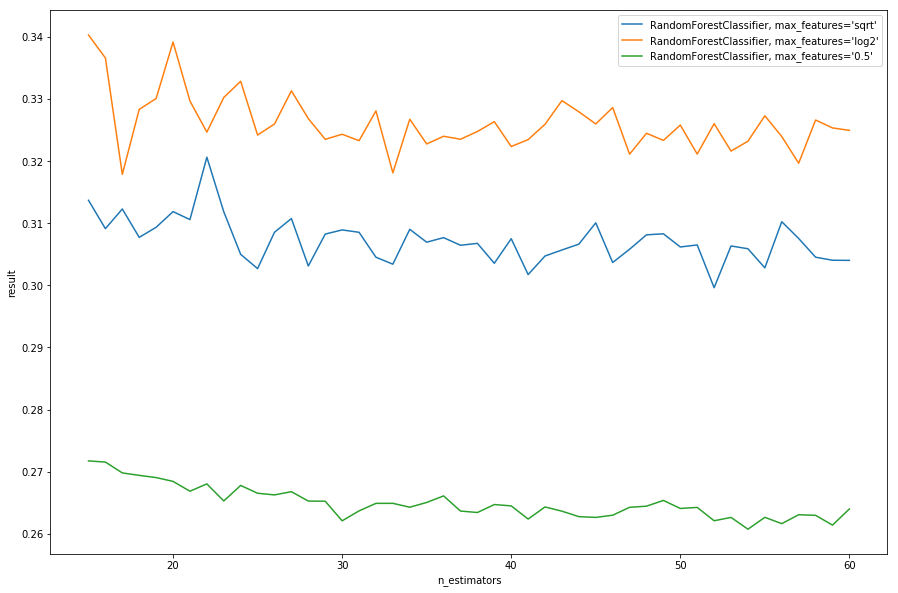

In [119]:
#plt.plot x then y 
for k,v in plot_data.items():
    x= v["x"]
    y = v["y"]
    plt.plot(x, y,label=k)



plt.xlabel("n_estimators")
plt.ylabel("result")
plt.legend(loc="upper right")

plt.show()

## Plotting min_samples_leaves

In [130]:
m2 = [
("RandomForestClassifier, min_samples_leaf='3'",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=3,max_features=0.5,n_jobs=-1,oob_score=True)
),
("RandomForestClassifier, min_samples_leaf='5''",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=5,max_features=0.5,n_jobs=-1,oob_score=True)
),
("RandomForestClassifier,  min_samples_leaf='7'",
 RandomForestRegressor(n_estimators=40,min_samples_leaf=7,max_features=0.5,n_jobs=-1,oob_score=True)
),
]
plot_data_leaf = {k:{"x":[],"y":[]} for k,v in m2}
min_estimators = 15
max_estimators = 60
for label,est in m2:
    for i in range(min_estimators, max_estimators + 1):
        est.set_params(n_estimators=i)
        est.fit(x_train, y_train)
        plot_data_leaf[label]["x"].append(i)
        plot_data_leaf[label]["y"].append(rmse(est.predict(x_valid), y_valid))



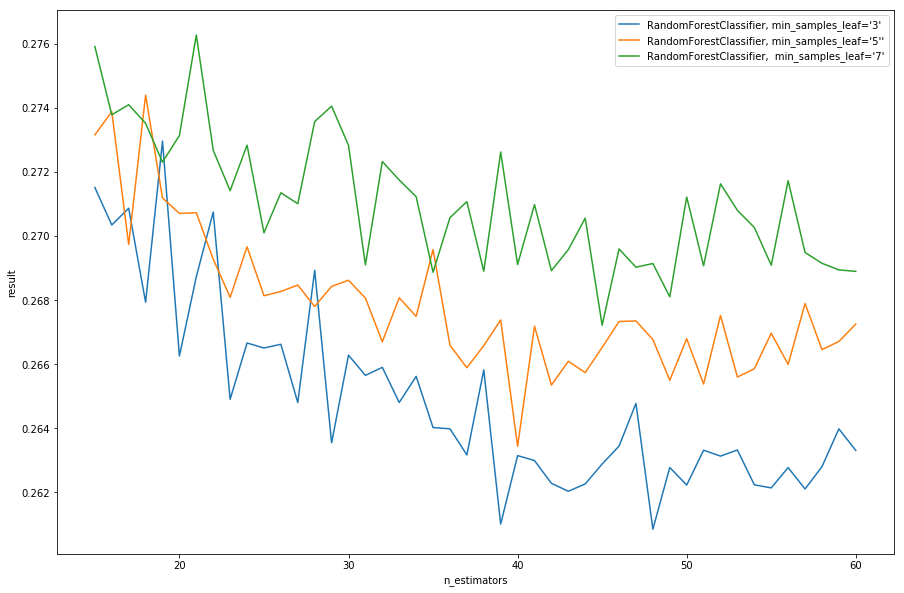

In [131]:
#plt.plot x then y 
for k,v in plot_data_leaf.items():
    x= v["x"]
    y = v["y"]
    plt.plot(x, y,label=k)



plt.xlabel("n_estimators")
plt.ylabel("result")
plt.legend(loc="upper right")

plt.show()